In [202]:
'''
CHAPTER 2: OVERVIEW OF SUPERVISED LEARNING

2.1 Introduction

- predictors / inputs / features (for pattern recognition) -> independent variables
- responses / outputs -> dependent variables

2.2 Variable Types and Terminology

- qualitative: finite set, categorical, discrete, factors
    - represented with numerical codes (0, 1 / -1, 1)
    - sometimes referred to as targets
    - dummy variables: a K-level qualitative variable is represented by a vector 
        of K binary variables or bits, only on eof which is "on" at a time.
- quantitative: infinite set, continuous
- ordered categorical: (i.e. small, medium, large), B0unds are not evenly 
    distributed between categories. See chapter 4 for more info

- Inputs will be X, Quantitative outputs are Y, Qualitative outputs are G
- regression: predicting quantitative outputs
- classification: predicting qualitative outputs / grouping

'''

'\nCHAPTER 2: OVERVIEW OF SUPERVISED LEARNING\n\n2.1 Introduction\n\n- predictors / inputs / features (for pattern recognition) -> independent variables\n- responses / outputs -> dependent variables\n\n2.2 Variable Types and Terminology\n\n- qualitative: finite set, categorical, discrete, factors\n    - represented with numerical codes (0, 1 / -1, 1)\n    - sometimes referred to as targets\n    - dummy variables: a K-level qualitative variable is represented by a vector \n        of K binary variables or bits, only on eof which is "on" at a time.\n- quantitative: infinite set, continuous\n- ordered categorical: (i.e. small, medium, large), B0unds are not evenly \n    distributed between categories. See chapter 4 for more info\n\n- Inputs will be X, Quantitative outputs are Y, Qualitative outputs are G\n- regression: predicting quantitative outputs\n- classification: predicting qualitative outputs / grouping\n\n'

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

C:\Users\duffy_t3xbk40\AppData\Local\Temp\ipykernel_17884\2137567737.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [204]:
def plotDataSet(dataSet):
    fig = plt.figure()
    plt.grid()
    plt.scatter(dataSet['X1'], dataSet['X2'], c=dataSet['Y'], marker='.')
    plt.xlim([0,100])
    plt.ylim([0,100])
    plt.show()


def convertDataSet(dataSet):
    A = np.vstack(
        [dataSet['X1'].to_list(), 
        dataSet['X2'].to_list(), 
        np.ones(len(dataSet.index))
        ]
    ).T
    return A

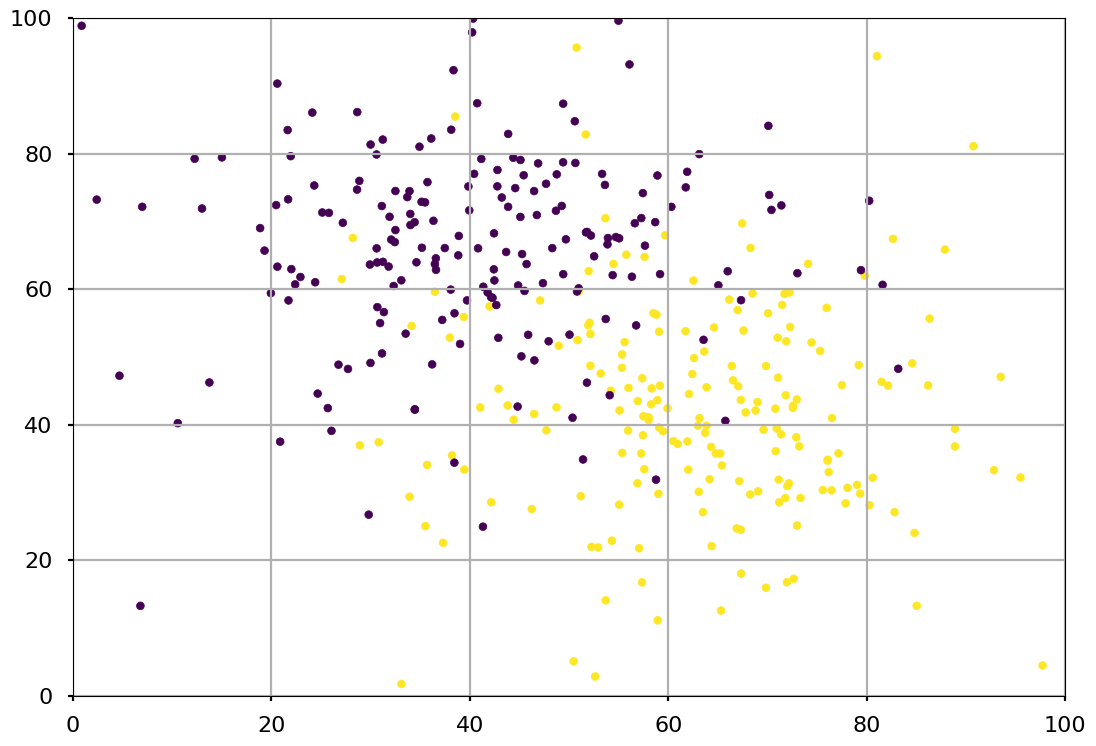

In [205]:
N = 200


groupA = pd.DataFrame({
    'X1': [random.gauss(mu=random.randint(55,75), sigma=random.randint(1,25)) for i in range(N)],
    'X2': [random.gauss(mu=random.randint(25,55), sigma=random.randint(1,25)) for i in range(N)],
    'Y': [1 for i in range(N)],
})

groupB = pd.DataFrame({
    'X1': [random.gauss(mu=random.randint(25,55), sigma=random.randint(1,25)) for i in range(N)],
    'X2': [random.gauss(mu=random.randint(55,75), sigma=random.randint(1,25)) for i in range(N)],
    'Y': [0 for i in range(N)],
})

dataSet = pd.concat([groupA, groupB])
X = convertDataSet(dataSet)
Y = np.array(dataSet['Y'])
plotDataSet(dataSet)

[ 0.01026696 -0.01165763  0.59812544]


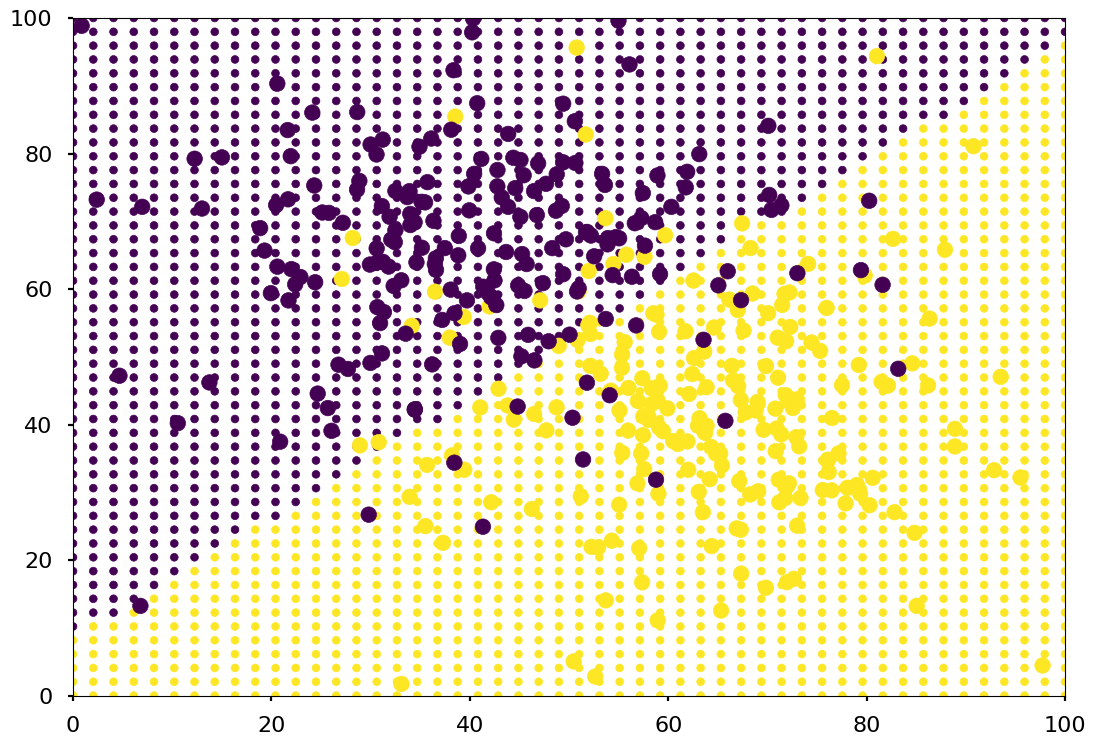

In [206]:
'''
2.3.1 Linear Models and Least Squares

Y^hat = B0^hat + sum(Xj*Bj^hat)
B0^hat = intercept OR bias

If you include a constant variable 1 and B0^hat in vector ofcoefficients B^hat
Y^hat = X^T * B^hat

RSS(B) = sum[(y_i - x_i*B)^2]
RSS is a quadratic function

'''
def calcRSS(dataSet, B):
    RSS = 0
    for i in range(len(dataSet.index)):
        Yh = B[0] + B[1]*dataSet.iloc[i, 'X1'] + B[2]*dataSet.iloc[i, 'X2']
        RSS += (dataSet.iloc[i, 'Y'] - Yh)**2
    return RSS


def plotLinearRegression(dataSet, yHat, xx, yy):
    fig, axis = plt.subplots()
    axis.scatter(xx, yy, c=yHat, marker='.')

    axis.scatter(dataSet['X1'], dataSet['X2'], c=dataSet['Y'], marker='o')
    axis.set_xlim(0, 100)
    axis.set_ylim(0, 100)
    plt.show()

pinv = np.linalg.pinv(X)
alpha = pinv.dot(Y)
print(alpha)

xx, yy = np.meshgrid(np.linspace(0,100), np.linspace(0,100))
alphaGrid = xx*alpha[0]  + yy*alpha[1] + alpha[2]
yHat = np.where(alphaGrid>0.5,1, 0)
plotLinearRegression(dataSet, yHat, xx, yy)


In [207]:
''' 
2.3.2 Nearest-Neighbor Methods

'''

' \n2.3.2 Nearest-Neighbor Methods\n\n'